# Assignment 3: Intro to Jupyter Notebook and ML using scikit on structured data


You can edit this notebook to finish the assigned tasks and answer the questions.

To get started with Jupyter Notebook, you can take the User Interface Tour in the Help menu. In Jupyter Notebook, you can put code in any cell and run it. Some cells are for text, headings, etc. They are called as "Markdown" cells. This cell is a markdown cell. Cells can be changed from code cells to markdown cells in the Cell menu -> Cell Type. If you want to learn more details about markdown cell(e.g. insert a hyperlink), please refer to [here](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet).

To run a single cell, you can type Shift+Enter. And you can rerun individual cells whenever you like. 

Try running the following cell:

In [1]:
print ("This is Assignment 1")

This is Assignment 1


Jupyter Notebooks will remember what you set variables to even after the code has finished running (until you clear outputs or change the variable in some way). The following code will find the current time when you run it:

In [2]:
import time
current_time = time.gmtime()
print (current_time)

time.struct_time(tm_year=2021, tm_mon=9, tm_mday=28, tm_hour=18, tm_min=29, tm_sec=57, tm_wday=1, tm_yday=271, tm_isdst=0)


If you print current_time in another cell later on, it will keep the value from when you originally set it. If you go back and rerun the above code, it will update.

In [3]:
# For example
print (current_time)

time.struct_time(tm_year=2021, tm_mon=9, tm_mday=28, tm_hour=18, tm_min=29, tm_sec=57, tm_wday=1, tm_yday=271, tm_isdst=0)


The magic of using Jupyter Notebook is that you can control the order of execuction of code cells. However, the concequence is that you do have to be careful about this if you run something later on in your code and then come back to an earlier part because variables may not have the values you expect at that point in the code. The following three blocks of code would always print out "original" if you ran them consecutively in regular code, but if you run them backwards in this notebook, you'll get an output of "new". Feel free to try:

In [4]:
x = 'original'

In [5]:
print (x)

original


In [6]:
x = 'new'

You will need to work with files in this assignment. "%pwd" commands tell you the full path name of working directory and "%ls" list the files in it.

In [7]:
%pwd

'/Users/bhavin/Downloads/In Class Assignment 3'

In [8]:
%ls

CIS8005-Fall21-Assignment3.docx   stocktrainingdata.csv
CIS8005_Fall21_Assignment3.ipynb  variables.txt
stocktestdata.csv


The "%ls" command should show you at least the two .csv data files, the .txt variable explanations files, and this jupyter notebook. If it doesn't, you may need to move those files to the working directory manually or change the working directory.

Next we can import the training data. We'll do this using pandas and numpy.

In [9]:
import pandas as pd
import numpy as np

### **(1) The code below will import the .csv as a dataframe type object, which we need it to be in to clean it a bit.**

In [10]:
trainingdata = pd.read_csv("stocktrainingdata.csv", header = 0)

In [11]:
#If you want to see your data
trainingdata

,Firm ID number,Stock price,Permanent Earnings per share,Transitory Earnings per share,Earnings per share
0,1,$32.04,3.196531792,0.901537047,4.098068839
1,2,$19.99,1.858203694,0.461789726,2.31999342
2,3,$18.93,1.479520196,0.324834428,1.804354623
3,4,$16.99,1.401072386,0.363023304,1.76409569
4,5,$23.30,2.058145612,0.607008279,2.665153891
...,...,...,...,...,...
75,76,$33.76,3.149658128,0.446014899,3.595673028
76,77,$19.76,1.79693608,0.382118331,2.179054411
77,78,$33.27,3.083121356,0.239893555,3.32301491
78,79,$18.07,1.69572036,0.546037499,2.241757859


In [12]:
#put your code here to see the data type of each column
trainingdata.dtypes

Firm ID number                    int64
Stock price                      object
Permanent Earnings per share     object
Transitory Earnings per share    object
Earnings per share               object
dtype: object

#### **(1a) Can you find stock price in the "trainingdata"? How to read it into dataframe "traningdata" as a number instead of a string? Hint: you need to add a converter for the relevant column.** 

In [13]:
# Enter code here to remove the dollar sign in the stock price

In [14]:
trainingdata['Stock price'] = trainingdata['Stock price'].str[1:]
trainingdata.head(10)

,Firm ID number,Stock price,Permanent Earnings per share,Transitory Earnings per share,Earnings per share
0,1,32.04,3.196531792,0.901537047,4.098068839
1,2,19.99,1.858203694,0.461789726,2.31999342
2,3,18.93,1.479520196,0.324834428,1.804354623
3,4,16.99,1.401072386,0.363023304,1.76409569
4,5,23.30,2.058145612,0.607008279,2.665153891
5,6,20.10,1.790338164,0.778743961,2.569082126
6,7,15.77,1.218859456,0.483420374,1.70227983
7,8,35.74,3.550036753,0.633571354,4.183608107
8,9,16.22,1.396175227,0.543075245,1.939250472
9,10,18.30,1.690487885,0.742018664,2.432506549


In [15]:
# Convert object data type to numeric data type
trainingdata['Stock price'] = pd.to_numeric(trainingdata['Stock price'], errors='coerce')
# Enter code here to convert other columns into numeric data types
cols = ['Permanent Earnings per share', 'Transitory Earnings per share', 'Earnings per share']
trainingdata[cols] = trainingdata[cols].apply(pd.to_numeric, errors='coerce', axis=1)

#### **(1b) In some obervations, the variables are missing. Please drop these observations.**

In [16]:
# Enter code here to drop the observations which has missing variables
trainingdata.dropna(inplace=True)
# If you want to see the data again
trainingdata.head(30)

,Firm ID number,Stock price,Permanent Earnings per share,Transitory Earnings per share,Earnings per share
0,1,32.04,3.196532,0.901537,4.098069
1,2,19.99,1.858204,0.461790,2.319993
2,3,18.93,1.479520,0.324834,1.804355
3,4,16.99,1.401072,0.363023,1.764096
4,5,23.30,2.058146,0.607008,2.665154
5,6,20.10,1.790338,0.778744,2.569082
6,7,15.77,1.218859,0.483420,1.702280
7,8,35.74,3.550037,0.633571,4.183608
8,9,16.22,1.396175,0.543075,1.939250
9,10,18.30,1.690488,0.742019,2.432507


#### **(1c) Find the relationship between the Earnings per share and stock price by plotting stock price against it**

<AxesSubplot:xlabel='Earnings per share', ylabel='Stock price'>

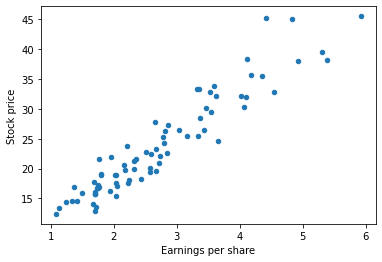

In [35]:
#Enter code here to plot the relationship
trainingdata.plot('Earnings per share', 'Stock price', kind='scatter')
#Alternatively, check the Correlation Matrix
#trainingdata.corr()

#### **(1d) Comment on the relationships above**
a.	Is it a positive or negative relationship, or is there no relationship?
b.	How does stock price change for a unit change in Earnings per share ? 

In [ ]:
print (len(("Strong, Positive Relationship, Increases for Unit Change in Earnings Per Share").split()))

#### **(1e)  Find the relationship between the Transitory Earnings per share and stock price by plotting stock price against it**

<AxesSubplot:xlabel='Transitory Earnings per share', ylabel='Stock price'>

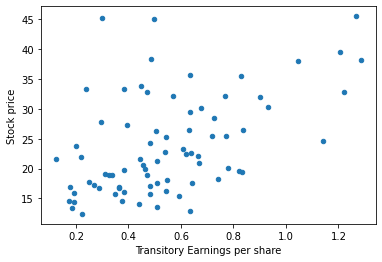

In [22]:
#Enter code here to plot the relationship
trainingdata.plot('Transitory Earnings per share', 'Stock price', kind='scatter')
#Check the Correlation Coefficient using np.corrcoef() function
#np.corrcoef(trainingdata['Earnings per share'], trainingdata['Stock price'])

#### **(1f) Comment on the relationships above**
a.	Is it a positive or negative relationship, or is there no relationship?
b.	How does stock price change for a unit change in Transitory Earnings?

In [ ]:
print (len(("Weak, Positive Relationship, Increases for Unit Change in Transitory Earnings").split()))

#### **(1g) Find the relationship between the Permanent Earnings per share and stock price by plotting stock price against it** 


<AxesSubplot:xlabel='Permanent Earnings per share', ylabel='Stock price'>

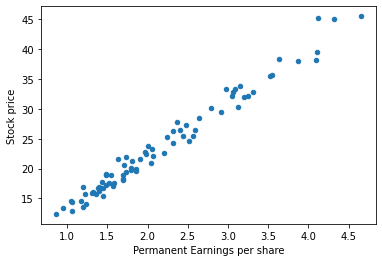

In [23]:
#Enter code here to plot the relationship
trainingdata.plot('Permanent Earnings per share', 'Stock price', kind='scatter')

#### **(1h) Comment on the relationships above**
a.	Is it a positive or negative relationship, or is there no relationship?
b.	How does stock price change for a unit change in Permanent Earnings?

In [ ]:
print (len(("Strong, Positive Relationship, Increases for Unit Change in Permanent Earnings").split()))



### 2) The next two lines split the data into two chunks. Train_X is the features and their values from the training dataset. Train_y is the class value that we want to predict.Note: we have removed Earnings per share from trainging data since it is a sum of permanent and transitory earnings per share. 


In [25]:
#This creates an array of features that includes all features except 'Stock price', 'Firm ID' and 'Earnings per share'. 'Stock price' is which is what we want to predict
Train_X = np.array(trainingdata.drop(['Stock price','Firm ID number','Earnings per share'],1))

#This creates an array that includes ONLY 'Stock price'
Train_y = np.array(trainingdata['Stock price'])

print (Train_X)

[[3.19653179 0.90153705]
 [1.85820369 0.46178973]
 [1.4795202  0.32483443]
 [1.40107239 0.3630233 ]
 [2.05814561 0.60700828]
 [1.79033816 0.77874396]
 [1.21885946 0.48342037]
 [3.55003675 0.63357135]
 [1.39617523 0.54307525]
 [1.69048789 0.74201866]
 [1.31107405 0.19085943]
 [1.90344157 0.44318224]
 [1.47757957 0.2691265 ]
 [3.63104113 0.48624679]
 [4.1135737  0.29846235]
 [1.69484522 0.33852236]
 [1.97484161 0.61750405]
 [3.31353755 1.22257905]
 [3.24790425 0.76765034]
 [2.56401123 0.77061744]
 [1.05627491 0.19146827]
 [2.59112129 0.83732831]
 [2.36439895 0.29369672]
 [1.80834035 0.50686003]
 [1.19800715 0.17651901]
 [2.01182967 0.20026529]
 [2.47252569 0.39471555]
 [3.87687688 1.04604605]
 [2.31507315 0.48380023]
 [1.48458469 0.31205416]
 [4.09821332 1.2840823 ]
 [1.44561157 0.28582042]
 [4.10476072 1.20696325]
 [4.32210384 0.49879904]
 [1.56618979 0.48069595]
 [1.36096951 0.34921646]
 [3.05324288 0.56973995]
 [0.95084974 0.18398197]
 [1.71230431 0.45456738]
 [0.86388546 0.22323857]


### 3) Next we actually make the predictor. We're using Linear Regression([documentation if you're interested](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)) within sklearn.

In [26]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(Train_X, Train_y)

### 4) Let's test it out. The following code takes a hand-entered set of data and predicts the stock price:

In [27]:
#You can play with this
prediction = reg.predict(np.asarray([3,1]).reshape(1,-1))

print('Prediction:', prediction)

Prediction: [29.79117926]


Then Let's print out the cofficients and intercept.

In [28]:
# coefficeints of the trained model
print('\nCoefficient of model :', reg.coef_)

# intercept of the model
print('\nIntercept of model',reg.intercept_)


Coefficient of model : [ 9.78586909 -4.57709238]

Intercept of model 5.0106643563804525


### 5) The next thing we need to do is to import the test set (stocktestdata.csv) and see how good our classifier is at predicting the values there. Do this, following the same steps as above to import and convert to arrays. Put the features in an array called 'Test_X' and the class (Stock price) in an array called 'Test_y'.

In [29]:
# Write code here to import the test data and convert into arrays


testdata = pd.read_csv("stocktestdata.csv", header = 0)
testdata['Stock price'] = testdata['Stock price'].str[1:]
# Convert object data type to numeric data type
testdata['Stock price'] = pd.to_numeric(testdata['Stock price'], errors='coerce')
cols = ['Permanent Earnings per share', 'Transitory Earnings per share', 'Earnings per share']
testdata[cols] = testdata[cols].apply(pd.to_numeric, errors='coerce', axis=1)
testdata.dropna(inplace=True)
testdata.head(30)

Test_X = np.array(testdata.drop(['Stock price','Firm ID number','Earnings per share'],1))
Test_y = np.array(testdata['Stock price'])


In [30]:
#Removed Earnings Per Share, Stock Price, Firm ID Number
print (Test_X.shape, Test_y.shape)

(20, 2) (20,)


#### 5a)Once you've properly imported the test set data, cleaned it, and put it into arrays, the following code should predict the stock price using the predictor you trained on the training data as applied to the attributes in the testing data. It will output your predictions and then the actual values.

In [31]:
#DO NOT EDIT THIS
Test_y_predicted = reg.predict(Test_X)

Test_y_predicted, Test_y

(array([14.75802427, 19.93491969, 27.31284421, 38.06346991, 20.10361726,
        24.23432817, 18.72627082, 23.07015695, 12.88938779, 17.09813371,
        21.95322379, 18.20480829, 44.61523762, 21.2452249 , 32.34192656,
        19.40606156, 19.0159723 , 33.32972583, 30.85611045, 20.85105262]),
 array([13.7 , 18.88, 28.2 , 39.09, 20.05, 23.17, 18.7 , 24.19, 12.85,
        17.45, 21.92, 19.16, 43.51, 21.16, 31.39, 18.33, 18.97, 32.2 ,
        30.73, 20.9 ]))

#### 5b) In the following box, write code to calculate and print out your "accuracy" for the model. The accuracy can be represented by mean squared root(MSE), which measures the difference between the values predicted by the model and values observed [See here](https://en.wikipedia.org/wiki/Mean_squared_error).  You could do it manually if you want, but there's an easy [function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) built into sklearn to do it.

In [32]:
#CALCULATE AND PRINT OUT YOUR ACCURACY SCORE
#HINT: from sklearn import metrics
from sklearn.metrics import mean_squared_error
mean_squared_error(Test_y, Test_y_predicted)

0.6045962124014982

### **6) Let's make a summary and answer the questions in the background section of "CIS8005-Fall21-Assignment3"**

#### 6a) What is the relation between earnings and stock price.

In [33]:
print (len(("Positive, Strong Relationship, Increases with Unit Change").split()))

9


#### 6b) Which firms have a stronger relationship between earnings and stock price.

In [40]:
print (len(("Firms with IDs 93 and 84 have stronger relationship b/w Earnings and Stock Price.").split()))
#trainingdata.sort_values(by=['Earnings per share', 'Stock price'],ascending=False)
#testdata.sort_values(by=['Earnings per share', 'Stock price'],ascending=False)

4


,Firm ID number,Stock price,Permanent Earnings per share,Transitory Earnings per share,Earnings per share
12,93,43.51,4.753033,1.509251,6.262284
3,84,39.09,4.065207,1.470100,5.535307
17,98,32.20,3.337340,0.948137,4.285478
18,99,30.73,3.031155,0.833945,3.865100
14,95,31.39,2.952090,0.340282,3.292372
7,88,24.19,2.287440,0.944943,3.232383
2,83,28.20,2.521887,0.519254,3.041140
5,86,23.17,2.296662,0.710314,3.006976
10,91,21.92,2.046891,0.674675,2.721566
9,90,17.45,1.645218,0.876631,2.521849


#### 6c) Why do these firms have stronger relationships between earnings and stock price.

In [ ]:
print (len(("Strong Relationships are due to high Permanent and Transitory Earnings per share.").split()))
#trainingdata.sort_values(by=['Permanent Earnings per share', 'Stock price'],ascending=False)
#testdata.sort_values(by=['Transitory Earnings per share', 'Stock price'],ascending=False)

#### 6d) Which firms would you recommend to invest in, and why.

In [ ]:
print (len(("Firms with both high Stock price and Earnings per share are safe to invest.").split()))